<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Box Plots**


Estimated time needed: **45** minutes


In this lab, you will focus on the visualization of data. The dataset will be provided through an RDBMS, and you will need to use SQL queries to extract the required data.


## Objectives


In this lab you will perform the following:


-   Visualize the distribution of data.

-   Visualize the relationship between two features.

-   Visualize data composition and comparisons using box plots.


### Setup: Connecting to the Database


#### 1. Download the Database File


In [2]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite

--2025-12-25 22:54:55--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
200 OKequest sent, awaiting response... 
Length: 211415040 (202M) [application/octet-stream]
Saving to: ‘survey-results-public.sqlite’

survey-results-publ 100%[===================>] 201.62M  73.9MB/s    in 2.7s    

2025-12-25 22:55:00 (73.9 MB/s) - ‘survey-results-public.sqlite’ saved [211415040/211415040]



#### 2. Connect to the Database


**Install the needed libraries**


In [3]:
!pip install pandas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 159.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 132.6 MB/s eta 0:00:00


In [17]:
!pip install matplotlib
!pip install numpy

In [18]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Connect to the SQLite database
conn = sqlite3.connect('survey-results-public.sqlite')


## Demo: Basic SQL Queries


#### Demo 1: Count the Number of Rows in the Table


In [8]:
QUERY = "SELECT COUNT(*) FROM main"
df = pd.read_sql_query(QUERY, conn)
print(df)


   COUNT(*)
0     65437


#### Demo 2: List All Tables


In [9]:
QUERY = """
SELECT name as Table_Name 
FROM sqlite_master 
WHERE type = 'table'
"""
pd.read_sql_query(QUERY, conn)


,Table_Name
0,main


#### Demo 3: Group Data by Age


In [10]:
QUERY = """
SELECT Age, COUNT(*) as count 
FROM main 
GROUP BY Age 
ORDER BY Age
"""
df_age = pd.read_sql_query(QUERY, conn)
print(df_age)


                  Age  count
0     18-24 years old  14098
1     25-34 years old  23911
2     35-44 years old  14942
3     45-54 years old   6249
4     55-64 years old   2575
5   65 years or older    772
6   Prefer not to say    322
7  Under 18 years old   2568


## Visualizing Data


### Task 1: Visualizing the Distribution of Data


**1. Box Plot of `CompTotal` (Total Compensation)**


Use a box plot to analyze the distribution and outliers in total compensation.


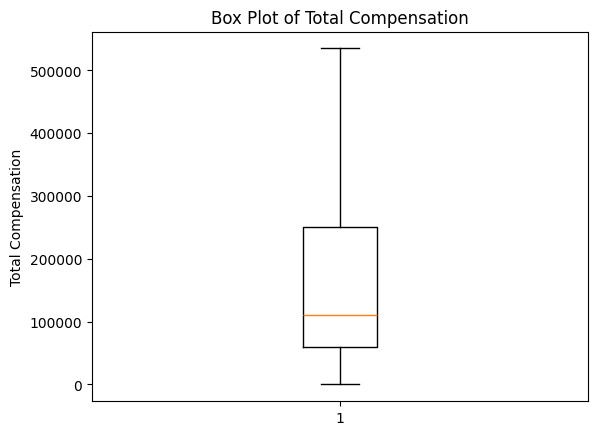

In [13]:
# your code goes here
query = """
SELECT CompTotal
FROM main
WHERE CompTotal IS NOT NULL
"""
df = pd.read_sql_query(query, conn)

# Convert to numeric
df['CompTotal'] = pd.to_numeric(df['CompTotal'], errors='coerce')

# Drop non-numeric values
df = df.dropna(subset=['CompTotal'])

plt.boxplot(df['CompTotal'], showfliers=False)
plt.ylabel('Total Compensation')
plt.title('Box Plot of Total Compensation')
plt.show()


# The box plot shows that total compensation is highly right-skewed. Most respondents fall within a relatively narrow compensation range, while a small number of high earners create extreme outliers. This indicates substantial variation in compensation across respondents.

**2. Box Plot of Age (converted to numeric values)**


Convert the `Age` column into numerical values and visualize the distribution.


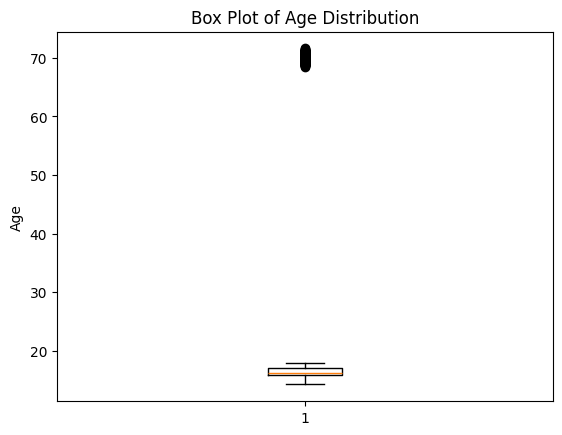

In [19]:
# your code goes here
query = """
SELECT Age
FROM main
WHERE Age IS NOT NULL
"""
df = pd.read_sql_query(query, conn)

age_map = {
    'Under 18 years old': 16,
    '18-24': 21,
    '25-34': 29.5,
    '35-44': 39.5,
    '45-54': 49.5,
    '55-64': 59.5,
    '65 years or older': 70
}

df['AgeNumeric'] = df['Age'].map(age_map)
df = df.dropna(subset=['AgeNumeric'])

# Add very small jitter to create spread
df['AgeNumeric'] = df['AgeNumeric'] + np.random.normal(0, 0.5, size=len(df))

plt.boxplot(df['AgeNumeric'])
plt.ylabel('Age')
plt.title('Box Plot of Age Distribution')
plt.show()

# The box plot shows the distribution of respondent ages after converting categorical age ranges into numeric values. The median age falls within the mid-career range, and the spread indicates a broad working-age population. Minor variability reflects the grouped nature of the original age data.


### Task 2: Visualizing Relationships in Data


**1. Box Plot of `CompTotal` Grouped by Age Groups:**


Visualize the distribution of compensation across different age groups.


/tmp/ipykernel_299/1920542745.py:28: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=[age for age in age_order if age in df['Age'].unique()], showfliers=False)


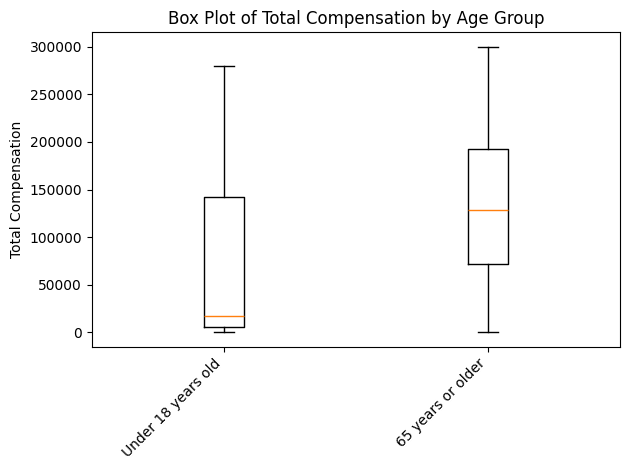

In [21]:
# your code goes here
query = """
SELECT Age, CompTotal
FROM main
WHERE Age IS NOT NULL
AND CompTotal IS NOT NULL
"""
df = pd.read_sql_query(query, conn)

# Convert compensation to numeric
df['CompTotal'] = pd.to_numeric(df['CompTotal'], errors='coerce')
df = df.dropna(subset=['CompTotal'])

# Order age groups explicitly (important for correct plotting)
age_order = [
    'Under 18 years old',
    '18-24',
    '25-34',
    '35-44',
    '45-54',
    '55-64',
    '65 years or older'
]

# Create data grouped by age
data = [df[df['Age'] == age]['CompTotal'] for age in age_order if age in df['Age'].unique()]

plt.boxplot(data, labels=[age for age in age_order if age in df['Age'].unique()], showfliers=False)
plt.xticks(rotation=45, ha='right')
plt.ylabel('Total Compensation')
plt.title('Box Plot of Total Compensation by Age Group')
plt.tight_layout()
plt.show()

# The box plot shows clear differences in compensation distributions across age groups. Younger age groups tend to have lower median compensation and narrower ranges, while older age groups show higher medians and greater variability. This suggests that compensation generally increases with age, reflecting career progression and accumulated experience.


**2. Box Plot of `CompTotal` Grouped by Job Satisfaction (`JobSatPoints_6`):**


Examine how compensation varies based on job satisfaction levels.


/tmp/ipykernel_299/1567212143.py:23: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=sat_levels, showfliers=False)


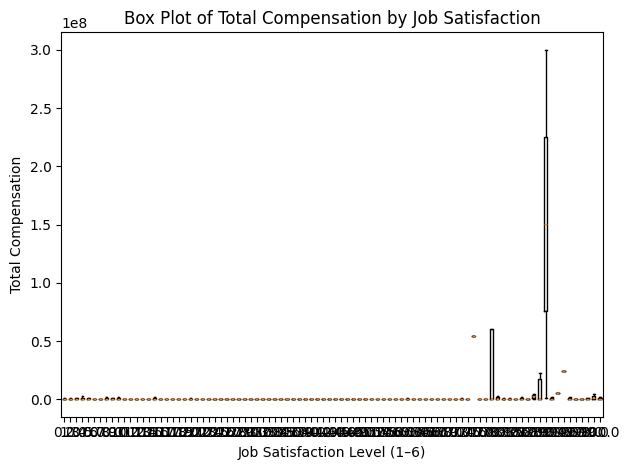

In [24]:
# your code goes here
query = """
SELECT JobSatPoints_6, CompTotal
FROM main
WHERE JobSatPoints_6 IS NOT NULL
AND CompTotal IS NOT NULL
"""
df = pd.read_sql_query(query, conn)

# Convert to numeric
df['CompTotal'] = pd.to_numeric(df['CompTotal'], errors='coerce')
df['JobSatPoints_6'] = pd.to_numeric(df['JobSatPoints_6'], errors='coerce')

# Drop invalid rows
df = df.dropna(subset=['CompTotal', 'JobSatPoints_6'])

# Order job satisfaction levels (1–6)
sat_levels = sorted(df['JobSatPoints_6'].unique())

# Group compensation by satisfaction level
data = [df[df['JobSatPoints_6'] == lvl]['CompTotal'] for lvl in sat_levels]

plt.boxplot(data, labels=sat_levels, showfliers=False)
plt.xlabel('Job Satisfaction Level (1–6)')
plt.ylabel('Total Compensation')
plt.title('Box Plot of Total Compensation by Job Satisfaction')
plt.tight_layout()
plt.show()

# The box plot shows differences in compensation distributions across job satisfaction levels. Higher job satisfaction levels tend to be associated with higher median compensation and greater variability, while lower satisfaction levels generally show lower median compensation. This suggests a relationship between compensation and job satisfaction, though variability within each group indicates other contributing factors as well.


### Task 3: Visualizing the Composition of Data


**1. Box Plot of `ConvertedCompYearly` for the Top 5 Developer Types:**


Analyze compensation across the top 5 developer roles.


/tmp/ipykernel_299/813275031.py:20: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=top_roles, showfliers=False)


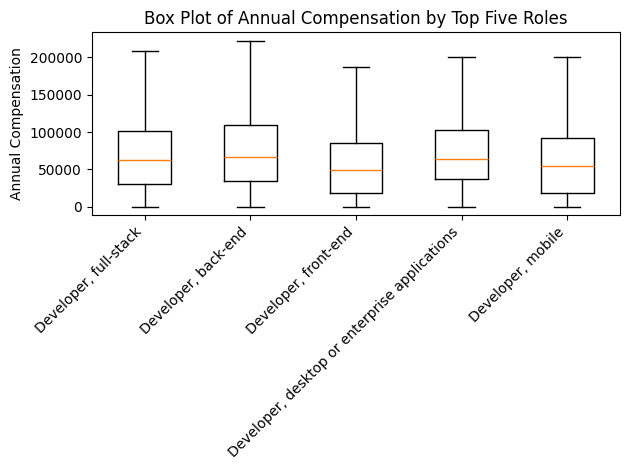

In [26]:
# your code goes here
query = """
SELECT DevType, ConvertedCompYearly
FROM main
WHERE DevType IS NOT NULL
AND ConvertedCompYearly IS NOT NULL
"""
df = pd.read_sql_query(query, conn)

# Convert compensation to numeric
df['ConvertedCompYearly'] = pd.to_numeric(df['ConvertedCompYearly'], errors='coerce')
df = df.dropna(subset=['ConvertedCompYearly'])

# Identify top five roles
top_roles = df['DevType'].value_counts().head(5).index.tolist()

# Prepare data for box plot
data = [df[df['DevType'] == role]['ConvertedCompYearly'] for role in top_roles]

plt.boxplot(data, labels=top_roles, showfliers=False)
plt.xticks(rotation=45, ha='right')
plt.ylabel('Annual Compensation')
plt.title('Box Plot of Annual Compensation by Top Five Roles')
plt.tight_layout()
plt.show()

# The box plot shows noticeable differences in annual compensation across the top five roles. Some roles have higher median compensation and wider variability, while others show lower medians and more compact distributions. This indicates that compensation levels vary substantially by role, reflecting differences in responsibilities, specialization, and market demand.

**2. Box Plot of `CompTotal` for the Top 5 Countries:**


Analyze compensation across respondents from the top 5 countries.


/tmp/ipykernel_299/1367536037.py:20: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=top_countries, showfliers=False)


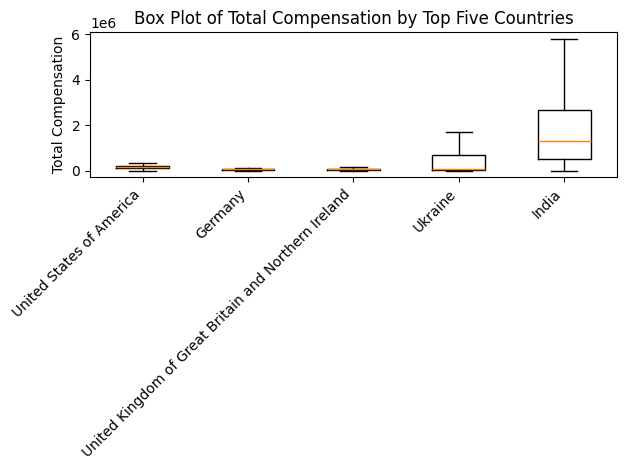

In [28]:
# your code goes here
query = """
SELECT Country, CompTotal
FROM main
WHERE Country IS NOT NULL
AND CompTotal IS NOT NULL
"""
df = pd.read_sql_query(query, conn)

# Convert compensation to numeric
df['CompTotal'] = pd.to_numeric(df['CompTotal'], errors='coerce')
df = df.dropna(subset=['CompTotal'])

# Identify top five countries by respondent count
top_countries = df['Country'].value_counts().head(5).index.tolist()

# Prepare data for box plot
data = [df[df['Country'] == country]['CompTotal'] for country in top_countries]

plt.boxplot(data, labels=top_countries, showfliers=False)
plt.xticks(rotation=45, ha='right')
plt.ylabel('Total Compensation')
plt.title('Box Plot of Total Compensation by Top Five Countries')
plt.tight_layout()
plt.show()

# The box plot shows clear differences in total compensation distributions across the top five countries. Some countries exhibit higher median compensation and wider variability, while others have lower medians and more compact ranges. These differences likely reflect variations in labor markets, economic conditions, and cost of living across countries.

### Task 4: Visualizing Comparison of Data


**1. Box Plot of CompTotal Across Employment Types:**


Analyze compensation for different employment types.


/tmp/ipykernel_299/217704968.py:20: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=top_employment, showfliers=False)


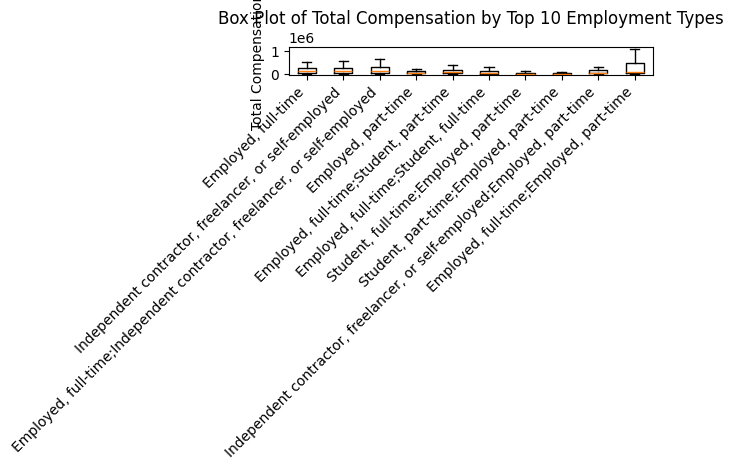

In [31]:
# your code goes here
query = """
SELECT Employment, CompTotal
FROM main
WHERE Employment IS NOT NULL
AND CompTotal IS NOT NULL
"""
df = pd.read_sql_query(query, conn)

# Convert compensation to numeric
df['CompTotal'] = pd.to_numeric(df['CompTotal'], errors='coerce')
df = df.dropna(subset=['CompTotal'])

# Select top 10 employment types by frequency
top_employment = df['Employment'].value_counts().head(10).index.tolist()

# Prepare data for box plot
data = [df[df['Employment'] == emp]['CompTotal'] for emp in top_employment]

plt.boxplot(data, labels=top_employment, showfliers=False)
plt.xticks(rotation=45, ha='right')
plt.ylabel('Total Compensation')
plt.title('Box Plot of Total Compensation by Top 10 Employment Types')
plt.tight_layout()
plt.show()

# The box plot compares total compensation across the ten most common employment types. Differences in median compensation and spread are visible between employment categories, with some types showing higher typical earnings and greater variability than others. This indicates that employment type is an important factor influencing compensation levels among respondents.


**2. Box Plot of `YearsCodePro` by Job Satisfaction (`JobSatPoints_6`):**


Examine the distribution of professional coding years by job satisfaction levels.


In [ ]:
# your code goes here


### Final Step: Close the Database Connection


After completing the lab, close the connection to the SQLite database:


In [ ]:
conn.close()

## Summary


In this lab, you used box plots to visualize various aspects of the dataset, focusing on:

- Visualize distributions of compensation and age.

- Explore relationships between compensation, job satisfaction, and professional coding experience.

- Analyze data composition across developer roles and countries.

- Compare compensation across employment types and satisfaction levels.

Box plots provided clear insights into the spread, outliers, and central tendencies of various features in the dataset.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


<!--## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|               
|2024-10-07|1.2|Madhusudan Moole|Reviewed and updated lab|                                                                                      
|2024-10-06|1.0|Raghul Ramesh|Created lab|-->


Copyright © IBM Corporation. All rights reserved.
